In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Training_Dataset_v2.csv')

In [3]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [4]:
df.shape

(1687861, 23)

In [5]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [6]:
df.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [6]:
#Describing the data
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [7]:
df.isnull().sum().sort_values(ascending=False)

lead_time            100894
went_on_backorder         1
sales_9_month             1
national_inv              1
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
min_bank                  1
rev_stop                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
sku                       0
dtype: int64

In [8]:
df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#removing the last row as it contained null values
df=df.drop([1687860],axis=0)
df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,...,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [10]:
df.shape

(1687860, 23)

In [11]:
df['lead_time'].describe()

count    1.586967e+06
mean     7.872267e+00
std      7.056024e+00
min      0.000000e+00
25%      4.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      5.200000e+01
Name: lead_time, dtype: float64

In [12]:
#Mean and median so we can take any one of them, lets go with the median value 8
df['lead_time']=df['lead_time'].fillna(df['lead_time'].median())

In [13]:
#Checking null values
df.isnull().sum().sort_values(ascending=False)

went_on_backorder    0
sales_9_month        0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
min_bank             0
rev_stop             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
sku                  0
dtype: int64

In [14]:
df.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

# Feature encoding of categorial variables

In [15]:
#Feature encoding of categorial values
def preprocessor(df):
    df = df.copy()
    le = preprocessing.LabelEncoder()
    df['potential_issue'] = le.fit_transform(df['potential_issue'])
    df['deck_risk'] = le.fit_transform(df['deck_risk'])
    df['oe_constraint'] = le.fit_transform(df['oe_constraint'])
    df['ppap_risk'] = le.fit_transform(df['ppap_risk'])
    df['stop_auto_buy'] = le.fit_transform(df['stop_auto_buy'])
    df['rev_stop'] = le.fit_transform(df['rev_stop'])
    df['went_on_backorder'] = le.fit_transform(df['went_on_backorder'])
    return df

In [16]:
df=preprocessor(df)

In [17]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,1044048,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0


In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1687860.0,7.879902,6.841952,0.0,4.00,8.00,8.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


In [19]:
df[(df['went_on_backorder'] == 1)].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
national_inv,11293.0,21.432746,608.192119,-2999.0,0.00,1.00,6.00,29332.0
lead_time,11293.0,6.370672,4.052485,0.0,2.00,8.00,8.00,52.0
in_transit_qty,11293.0,4.338617,47.313292,0.0,0.00,0.00,0.00,2259.0
forecast_3_month,11293.0,157.314354,1634.781769,0.0,3.00,12.00,40.00,120000.0
forecast_6_month,11293.0,244.678916,2457.176079,0.0,5.00,19.00,64.00,170880.0
forecast_9_month,11293.0,325.939520,3145.250001,0.0,7.00,24.00,88.00,207160.0
sales_1_month,11293.0,29.364474,273.212029,0.0,0.00,3.00,9.00,20005.0
sales_3_month,11293.0,79.350748,509.481213,0.0,2.00,8.00,24.00,20033.0
sales_6_month,11293.0,139.271230,901.024234,0.0,3.00,14.00,43.00,27893.0
sales_9_month,11293.0,206.377668,1375.447106,0.0,4.00,19.00,63.00,43796.0


In [20]:
df[(df['went_on_backorder'] == 0)].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
national_inv,1676567.0,499.309119,29714.739833,-27256.0,4.00,15.00,81.00,12334404.0
lead_time,1676567.0,7.890068,6.855769,0.0,4.00,8.00,8.00,52.0
in_transit_qty,1676567.0,44.319523,1347.246791,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1676567.0,178.259421,5041.668512,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1676567.0,345.662315,9826.013034,0.0,0.00,0.00,11.00,2461360.0
forecast_9_month,1676567.0,507.579735,14424.952051,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1676567.0,56.104982,1934.547772,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1676567.0,175.670378,5209.661919,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1676567.0,343.092551,9645.191056,0.0,0.00,2.00,30.00,2146625.0
sales_9_month,1676567.0,527.417690,14888.053478,0.0,0.00,4.00,46.00,3205172.0


# BOXPLOT of quantitative values
# we are not able to find anything from BOX Plots

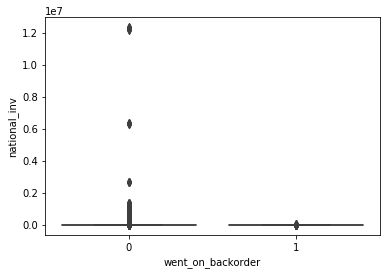

In [29]:
sns.axes_style('whitegrid')
sns.boxplot(y="national_inv", x='went_on_backorder',data=df)

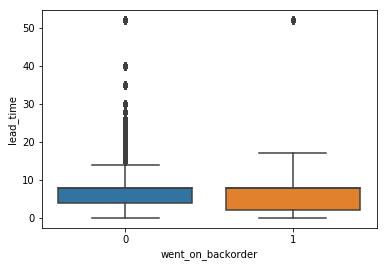

In [30]:
sns.boxplot(y="lead_time", x='went_on_backorder',data=df)

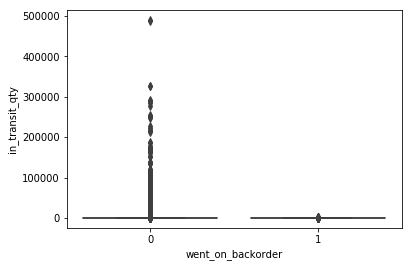

In [31]:
sns.boxplot(y="in_transit_qty", x='went_on_backorder',data=df)

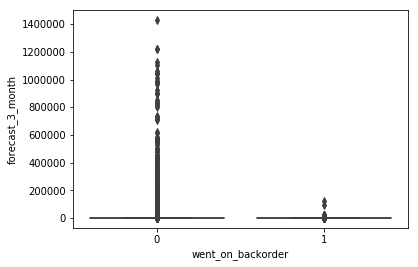

In [32]:
sns.boxplot(y="forecast_3_month", x='went_on_backorder',data=df)

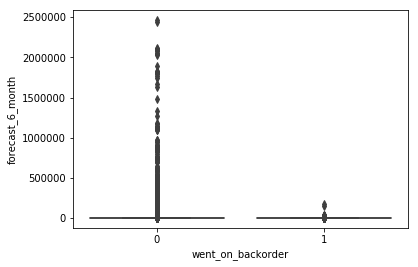

In [33]:
sns.boxplot(y="forecast_6_month", x='went_on_backorder',data=df)

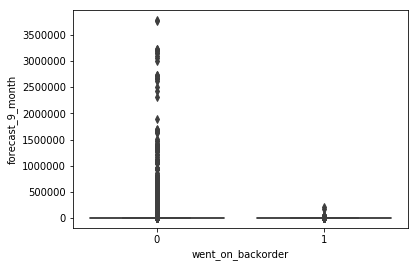

In [34]:
sns.boxplot(y="forecast_9_month", x='went_on_backorder',data=df)

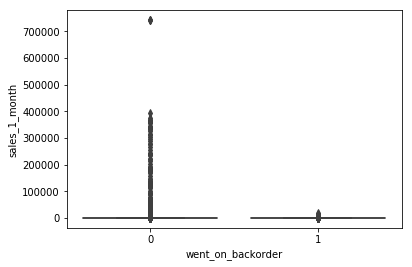

In [35]:
sns.boxplot(y="sales_1_month", x='went_on_backorder',data=df)

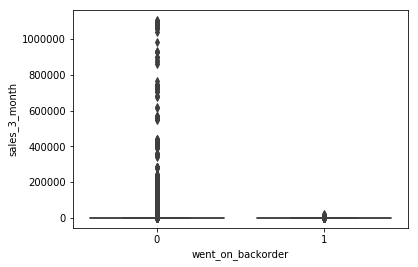

In [36]:
sns.boxplot(y="sales_3_month", x='went_on_backorder',data=df)

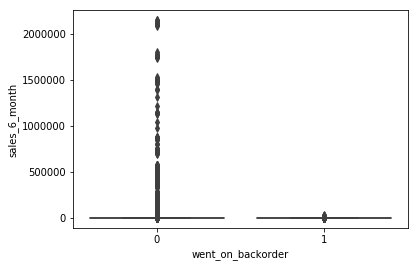

In [37]:
sns.boxplot(y="sales_6_month", x='went_on_backorder',data=df)

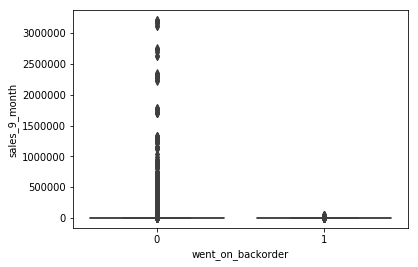

In [38]:
sns.boxplot(y="sales_9_month", x='went_on_backorder',data=df)

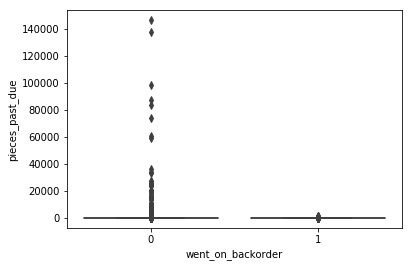

In [39]:
sns.boxplot(y="pieces_past_due", x='went_on_backorder',data=df)

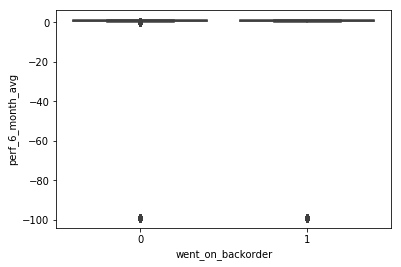

In [40]:
sns.boxplot(y="perf_6_month_avg", x='went_on_backorder',data=df)

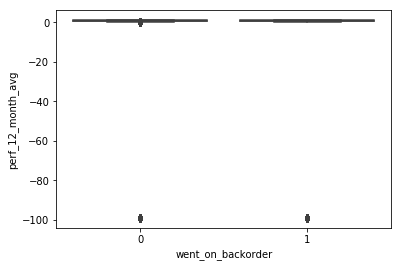

In [41]:
sns.boxplot(y="perf_12_month_avg", x='went_on_backorder',data=df)

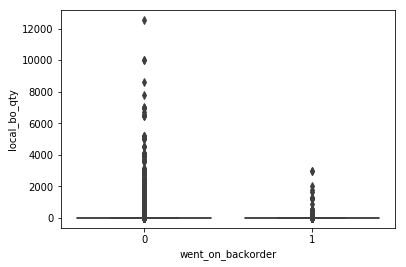

In [42]:
sns.boxplot(y="local_bo_qty", x='went_on_backorder',data=df)